### 샤이니 기본 구조 : 사용자 인터페이스, 서버, 실행

#### ui() : 사용자에게 보이는 화면으로, 데이터 입력과 분석 결과 출력
#### server() : 입력 결과를 처리한 다음 다시 ui()로 전송
#### shinyApp() : 애플리케이션 실행

```R
ui <- fluidPage("사용자 인터페이스")  # 구성 1: ui
server <- function(input, output, session){}  # 구성 2: server
shinyApp(ui, server)  # 구성 3: 실행
```

<img>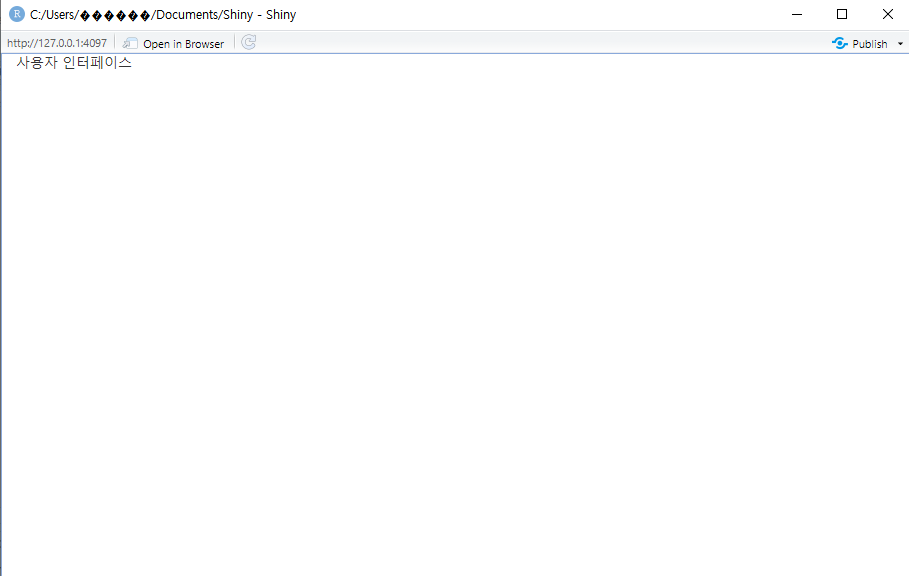

- 스크립트 안에 ```shinyApp(ui, server)```이 포함되면 R 스튜디오는 샤이니 앱 작성 코드로 인식

=> 편집기의 실행 버튼을 \<Run App>으로 변경

### 
### 샘플 실행
- 데이터 분석은 크게 명령형과 반응형 방식으로 구분
- 명령형 : 데이터 분석을 단계별로 진행, 기존 데이터 분석이 명령형
- 반응형 : 분석을 진행하다가 특정한 조건이 바뀌면 되돌아가 다시 분석(feedback)하는 방식, 샤이니 애플리케이션은 반응형 방식으로 동작


```R
library(shiny)    # 라이브러리 등록
runExample()      # 샘플 보여주기
runExample("01_hello")   # 첫 번째 샘플 실행하기
```

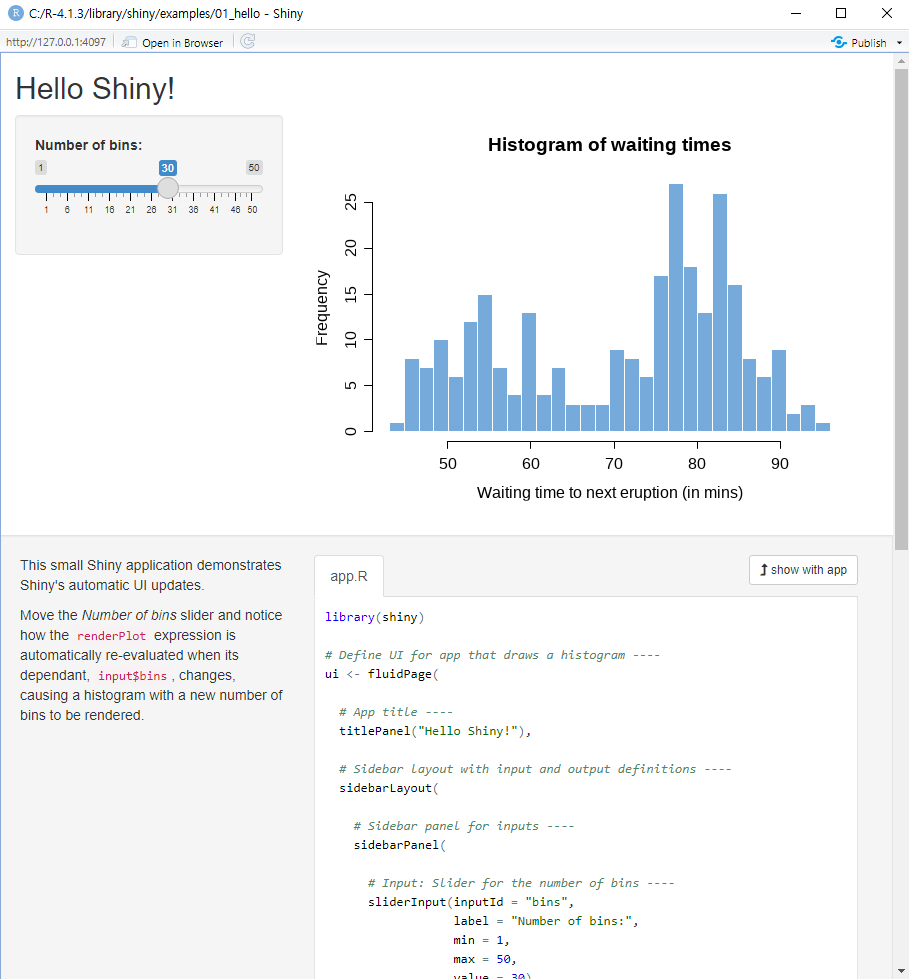

In [3]:
library(tidyverse)
ggplot2::theme_set(theme_bw)

In [4]:
faithful <- faithful
faithful %>% head(2)

,eruptions,waiting
,<dbl>,<dbl>
1,3.6,79
2,1.8,54


### 
### 사용자 인터페이스
### ```fluidPage( titlePanel, slidebarLayout, mainPanel )``` : 단일 페이지 화면을 생성
### 

### ```titlePanel( "타이틀" )``` : 타이틀 입력
### 

### ```sidebarLayout( sidebarPanel, mainPanel )``` : 사이드바 정의
#### - ```sidebarPanel( sliderInput )``` : 사이드바 패널
- ```sliderInput( inputid, label, min, max, value )``` : 일정 범위의 데이터를 입력하여 input$bins에 저장한 다음 서버로 전달

    - ```inputid``` : 입력 아이디, ui()에서 입력된 값을 server()로 전달하기 위한 링크 역할
    - ```label``` : 사이드바 이름, ui의 화면에 표시되는 제목
    - ```min```, ```max``` : 사이드바 선택 범위 (min ~ max)
    - ```value``` : 사이드바 default 값, 실제 입력되는 최솟값과 최댓값으로써 입력 아이디와 함께 server()로 전달됨



### ```mainPanel( plotOutput() )``` : 메인 패널
- **```plotOutput( outputId )``` : 서버에서 계산된 결과인 output$distPlot을 받아서 차트로 출력**
    - ```outputId``` : 출력 아이디
    
- **```textOutput()``` : 서버에서 계산된 결과인 output$value**를 받아 텍스트로 출력

- **```dt::dataTableOutput()``` : 서버에서 계산된 결과인 output$table**을 받아 테이블로 출력

```R
library(shiny)      
ui <- fluidPage(     # 사용자 인터페이스 시작: fluidPage 정의
  titlePanel("샤이니 1번 샘플"),  # 타이틀 입력
  # 레이아웃 구성: 사이드바 패널 + 메인패널 
  sidebarLayout(
    sidebarPanel(  # 사이드바 패널 시작
      # 입력값: input$bins 저장
      sliderInput(inputId = "bins",         # 입력 아이디  
                  label = "막대(bin)갯수:",  # 텍스트 라벨  
                  min = 1, max = 50,        # 선택 범위(1-50)
                  value = 30)),             # 기본 선택 값 30
    mainPanel(   # 메인패널 시작
      # 출력값: output$distPlot 저장
      plotOutput(outputId = "distPlot"))  # 차트 출력
  ))
```

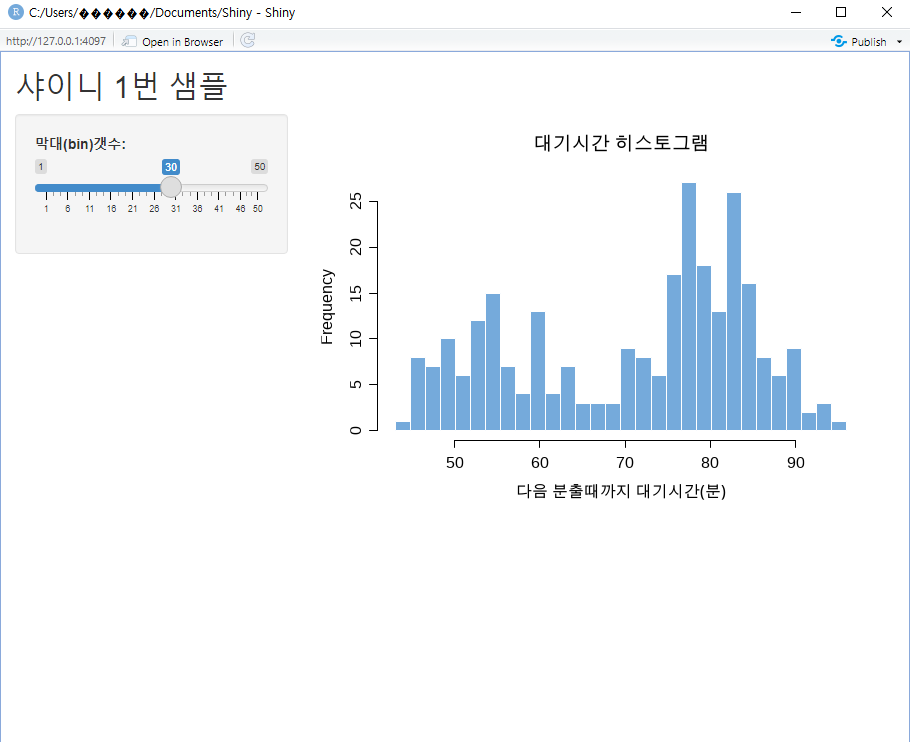

### 서버 부분
### - ```server()```는 ```ui()```의 **input\$bins** 를 입력받아 분석한 다음, **output\$distPlot**으로 전달
### - ```session```은 여러 사람이 동시에 샤이니를 이요할 경우 독립성을 확보하는 역할

### 

### **input\$bins**는 ```renderPlot()```안에서 분석되어 최종적으로 **output\$distPlot**에 저장 
### => 사용자 인터페이스 부분의 ```plotOutpu()```을 통하여 화면에 출력 
### => 최종적으로 ui와 server로 ```shinyApp()```을 실행하면 샤이니 애플리케이션이 실행

```R
server <- function(input, output, session) {
  # 랜더링한 플롯을 output 인자의 distPlot에 저장
  output$distPlot <- renderPlot({
    x <- faithful$waiting # 분출대기시간 정보 저장
    # input$bins을 플롯으로 랜더링
    bins <- seq(min(x), max(x), length.out = input$bins + 1)
    # 히스토그램 그리기 (맥 사용자 폰트 추가 필요)
    hist(x, breaks = bins, col = "#75AADB", border = "white",
         xlab = "다음 분출때까지 대기시간(분)",  
         main = "대기시간 히스토그램")
  })
}
```

### 실행

```R
shinyApp(ui, server)
```

### 
### 입력과 출력

### 1. 입력받기 input$ ~ 
- 샤이니는 입력 조건을 바꿔서 서버의 계산을 거쳐 출력 결과로 전달하는 과정이 중요

#### input() => server() => output()

```R
library(shiny) 
ui <- fluidPage(   
  sliderInput("range", "연비", min = 0, max = 35, value = c(0, 10))) # 입력

server <- function(input, output, session) {}  # 정의하지 않아서 반응 없음

shinyApp(ui, server)  # 실행
```

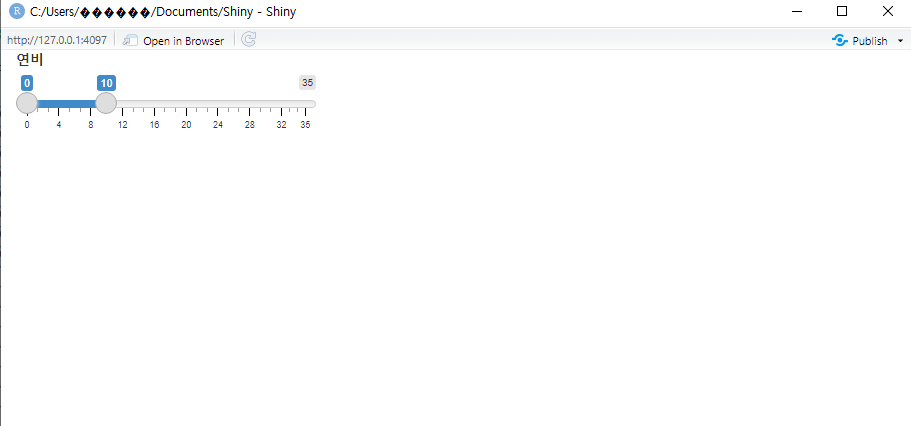

### 2. 출력하기 output$ \~

```R
library(shiny) 
ui <- fluidPage(
  sliderInput("range", "연비", min = 0, max = 35, value = c(0, 10)), # 입력
  textOutput("value"))  # 결괏값 갱신 안됨

server <- function(input, output, session) {
  output$value <- renderText((input$range[1] + input$range[2]))}  

shinyApp(ui, server)
```

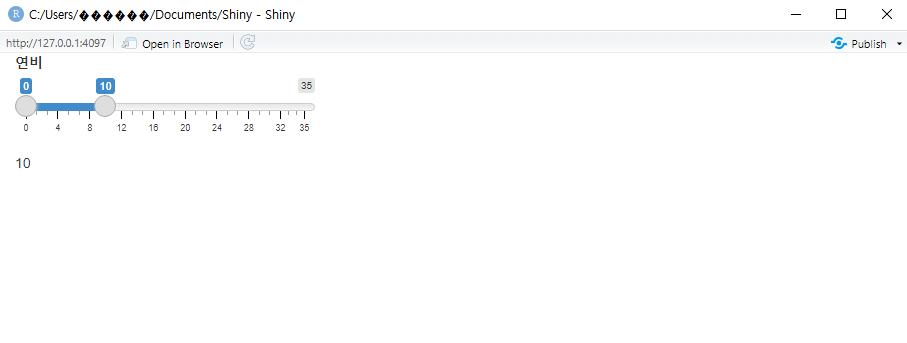

### 3. 렌더링 함수의 중요성 render~()

### ```renderPlot()``` : 그래프 출력
### ```renderText()``` : 텍스트 출력
### ```DT::renderDataTable()``` : 테이블 출력

- ui()에서 입력된 값이 server()에서 처리되고 결과가 다시 ui()로 돌아오는 과정이 중요

**=> 이 흐름이 원활하기 이루어지지 않으면 오류가 발생**


```R
library(shiny) 
ui <- fluidPage(
  sliderInput("range", "연비", min = 0, max = 35, value = c(0, 10)), # 입력
  textOutput("value"))    # 결과 출력

server <- function(input, output, session) {
  output$value <- (input$range[1] + input$range[2])}   # 렌더링 함수가 없음 => 오류발생

shinyApp(ui, server)
```

### 
### 반응형 웹 애플리케이션 생성

### 1. 데이터 준비

In [5]:
library(DT)      
library(ggplot2)
mpg <- mpg
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


### 2. 반응식 작성
### ```reactive()``` : 사용자 입력에 따라서 반응 (결과를 필터링)하도록 하는 반응식

```R
library(shiny) 
ui <- fluidPage(
  sliderInput("range", "연비", min = 0, max = 35, value = c(0, 10)), # 입력
  DT::dataTableOutput("table"))   # 출력

server <- function(input, output, session) {
  # 반응식
  cty_sel = reactive({  
    cty_sel = subset(mpg, cty >= input$range[1] & cty <= input$range[2])
    return(cty_sel)})    
  # 반응결과 렌더링
  output$table <- DT::renderDataTable(cty_sel()) }

shinyApp(ui, server)
```

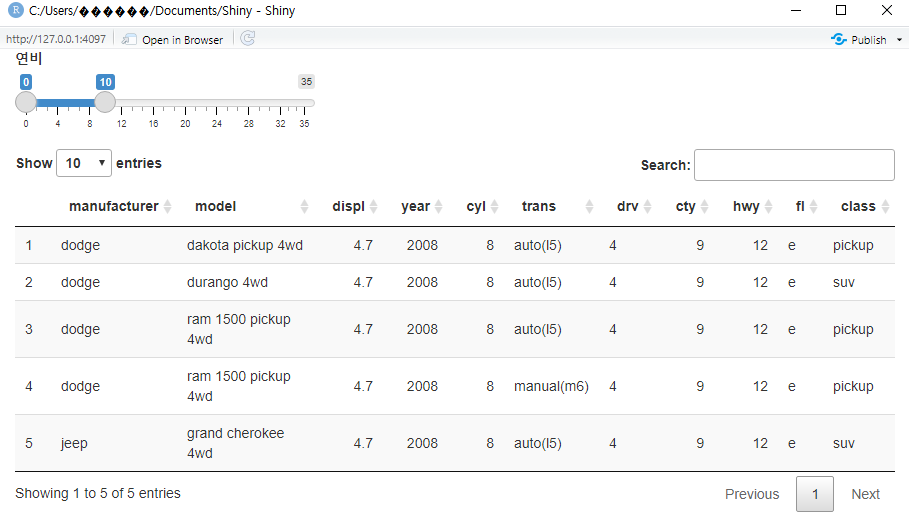

### 
### 레이아웃 정의
### 레이아웃 : 제한된 공간 안에 문자, 그림, 기호, 사진 같은 구성 요소를 효과적으로 배치
- 샤이니에서 레이아웃이란 제한된 화면 안에 입력 위젯과 출력 결과를 배치하는 방식을 의미
- 일반적으로 작업의 편의와 공간 배치의 효율을 생각하여 **그리드**라 불리는 규격화된 레이아웃을 선호

#### 그리드 방식을 사용하려면 ui()에서 ```fluidPage()``` -> ```fluidRow()``` -> ```column()```순서로 화면을 정의

### 1. 단일 페이지 레이아웃
### ```fluidPage()``` : 단일 페이지 화면 시작
### ```fluidRow()``` : 그리드형 배치 사용
### ```column()``` : 화면의 배치 설정 (최대 폭은 12)

```R
library(shiny)

# 전체 페이지 정의
ui <- fluidPage(  
  # 행 row 구성 정의
  fluidRow(    
    # 첫번째 열: 붉은색(red) 박스로 높이 450 픽셀, 폭 9
    column(9, div(style = "height:450px;border: 4px solid red;","폭 9")),
    # 두번째 열: 보라색(purple) 박스로 높이 450 픽셀, 폭 3
    column(3, div(style = "height:450px;border: 4px solid purple;","폭 3")),
    # 세번째 열: 파란색(blue) 박스로 높이 400 픽셀, 폭 12
    column(12, div(style = "height:400px;border: 4px solid blue;","폭 12"))))
server <- function(input, output, session) {}
shinyApp(ui, server)
```

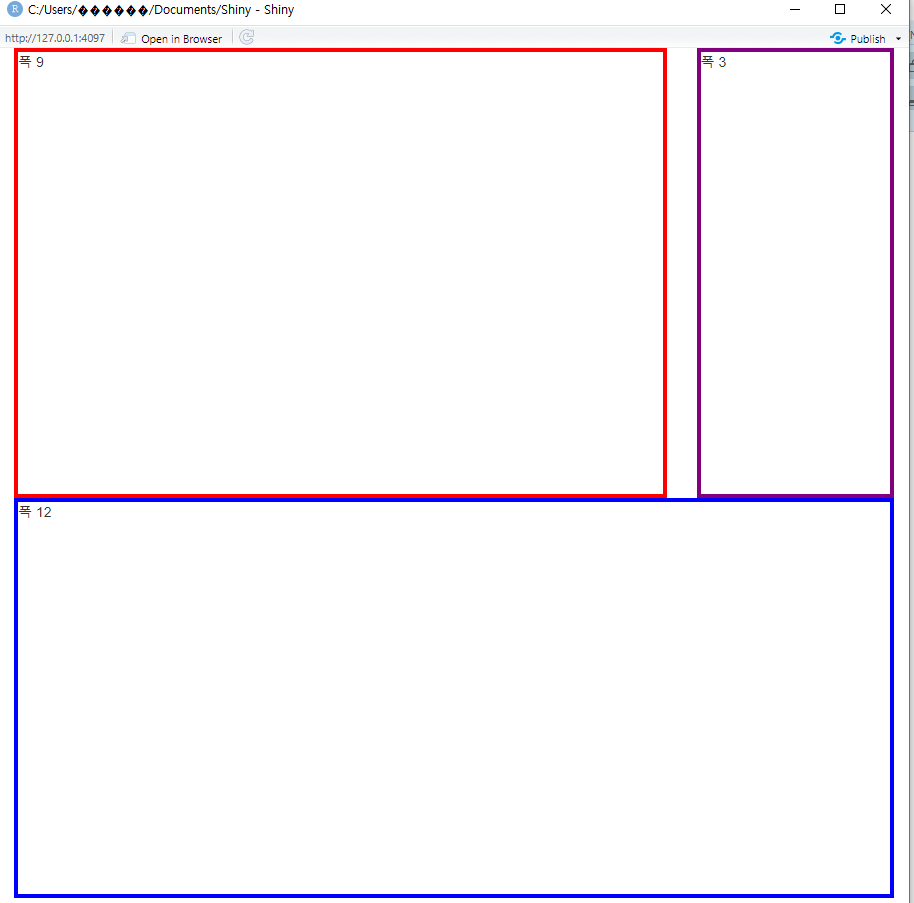

### 
### 탭 페이지 추가
- 단일 페이지에 모든 콘텐츠를 담아낼 수 없을 때, 사이드바나 탭 같은 화면 확장 방법을 활용 가능

### ```tabsetPanel( tapPanel(), tabPanel(), ... )``` : 탭 패널을 시작, 추가하고 싶은 탭의 개수를 결정
### ```tabPanel("탭 이름", column() )``` : 탭 추가

```R
library(shiny)
ui <- fluidPage(
  fluidRow(
    column(9, div(style = "height:450px;border: 4px solid red;","폭 9")),
    column(3, div(style = "height:450px;border: 4px solid red;","폭 3")),
    # 탭패널 1~2번 추가 
    tabsetPanel(
      tabPanel("탭1",   
               column(4, div(style = "height:300px;border: 4px solid red;","폭 4")),
               column(4, div(style = "height:300px;border: 4px solid red;","폭 4")),           
               column(4, div(style = "height:300px;border: 4px solid red;","폭 4")), ),              
      tabPanel("탭2", div(style = "height:300px;border: 4px solid blue;","폭 12")))))
server <- function(input, output, session) {}
shinyApp(ui, server)
```

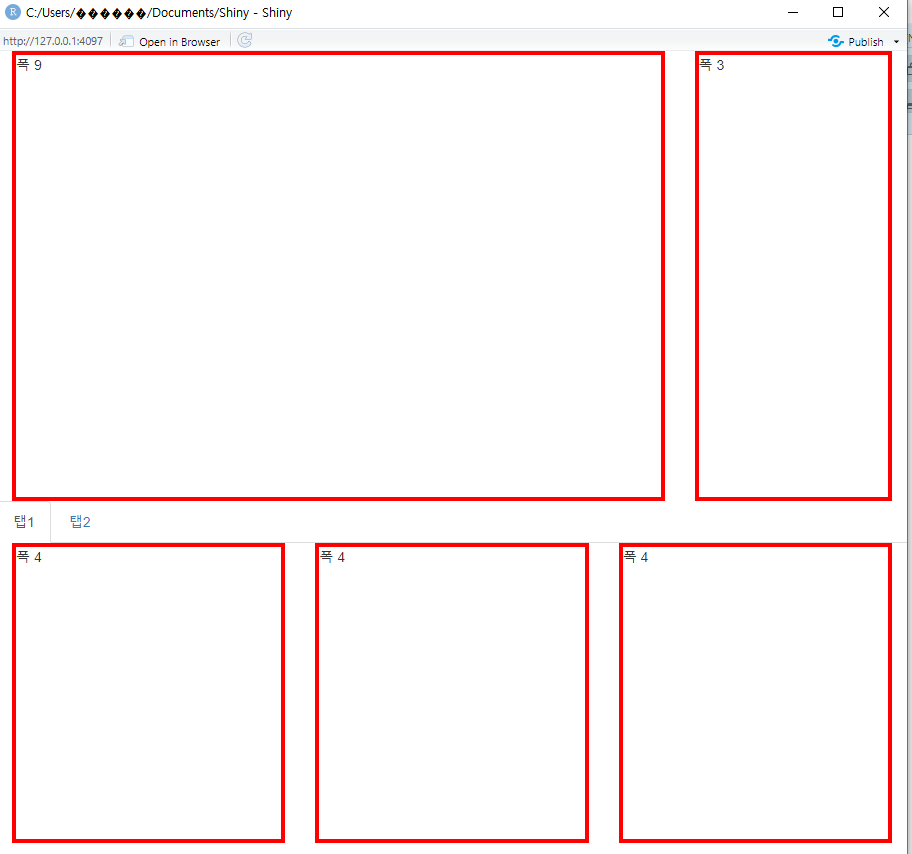